In [17]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch

from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *
from VIGOR_Figure5_Functions import *

plt.style.use('./Figures/paper.mplstyle')

In [18]:
def create_teal_palette(num_shades=10, start_intensity=50, end_intensity=220):
    """
    Create a palette of shades of teal.

    Parameters:
        num_shades (int): Number of shades to generate.
        start_intensity (int): Starting intensity of teal color (0 to 255).
        end_intensity (int): Ending intensity of teal color (0 to 255).

    Returns:
        list: List of RGB tuples representing shades of teal.
    """
    teal_palette = []
    intensity_values = np.linspace(start_intensity, end_intensity, num_shades)
    for intensity in intensity_values:
        teal_color = (0, int(intensity), int(intensity))
        teal_palette.append(np.array(teal_color) / 255)
    return teal_palette

def create_blue_violet_palette(num_shades=10, start_intensity=50, end_intensity=200):
    """
    Create a palette of shades of blue-violet.

    Parameters:
        num_shades (int): Number of shades to generate.
        start_intensity (int): Starting intensity of blue-violet color (0 to 255).
        end_intensity (int): Ending intensity of blue-violet color (0 to 255).

    Returns:
        list: List of RGB tuples representing shades of blue-violet.
    """
    blue_violet_palette = []
    intensity_values = np.linspace(start_intensity, end_intensity, num_shades)
    for intensity in intensity_values:
        blue_violet_color = (int(intensity), 0, int(intensity))
        blue_violet_palette.append(np.array(blue_violet_color) / 255)
    return blue_violet_palette

In [19]:
rat_markers = {}
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
            #    'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
            #    'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal', 

                'RatF50': 'DMS', 'RatF51': 'DLS', 'RatF52': 'DLS',
               'RatM50': 'DMS', 'RatM51': 'DMS', 'RatM52': 'DLS', 'RatM53': 'normal', 'RatM54': 'normal'
               }

intact_map = plt.cm.get_cmap('twilight')
lesion_map = plt.cm.get_cmap('autumn')

# markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
# lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

# RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]
intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54'
            ]

m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in intact if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in intact if 'F' in x]), start_intensity=80)
for index, animal in enumerate(intact):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'd', lines[brainstatus[animal]]]
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 's', lines[brainstatus[animal]]]
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

In [20]:



# alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
# # vars = alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u
# # names = ('alpha_0', 'alpha_t', 'alpha_u', 'gamma_0', 'gamma_t', 'gamma_u', 
# #         'mu_0', 'mu_t', 'mu_u', 'sigma_0', 'sigma_t', 'sigma_u')

# # v = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_u$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", 
# #         r'$\mu_0$', r"$\mu_t$", r"$\mu_u$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_u$"]



# vars = alpha_0, alpha_t, gamma_0, gamma_t, gamma_u, mu_0, mu_t
# names = ('alpha_0', 'alpha_t', 'gamma_0', 'gamma_t', 'gamma_u', 'mu_0', 'mu_t')
# labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$"]



# ICC

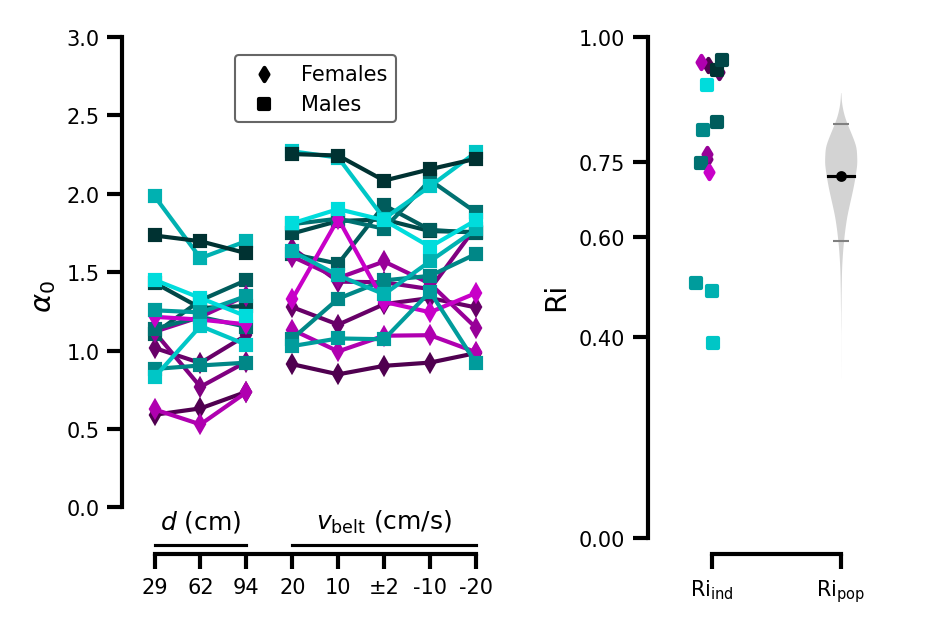

In [21]:
   
def Figure5ALeft(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    
    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    x = np.arange(len(conds))

    for animal in intact:
        ydist = np.array([alpha_0[animal][cond] for cond in ["60", "90", "120"]])
        yTM = np.array([alpha_0[animal][cond] for cond in ["20", "10", "2", "rev10", "rev20"]])
        yBetween = np.array([alpha_0[animal][cond] for cond in ["120", "rev20"]])

        zorder = 2 if animal == 'RatM00' else 1
        ax.plot([0, 1, 2], ydist, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)
        ax.plot([3, 4, 5, 6, 7], yTM, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)
        # ax.plot([2, 3], yBetween, color=rat_markers[animal][0],lw=.1)


    ax.set_xticks(x)
    ax.set_xticklabels(["29", "62", "94", "20", "10", "±2", "-10", "-20"])
    ax.set_ylabel(r'$\alpha_0$')
    ax.set_ylim(0, 3)
    ax.set_xlim(0, 7)
    # ax.set_xlabel('condition')
    space_axes(ax, y_ratio=.1, x_ratio_left=.1, x_ratio_right=.1)
    annotation_d_vbelt(ax=ax, miny=0)
    
    
    # dummy legend
    ax.scatter([-10, -10], [-10, -10], color='k', marker='d', s=5, label='Females') #'u'$\u2640$'')
    ax.scatter([-10, -10], [-10, -10], color='k', marker='s', s=5, label='Males')#=u'$\u2642$')

    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='center', bbox_to_anchor=(0.5, .9), 
                                frameon=True, fontsize=5, markerscale=1, 
                                edgecolor='k', facecolor='w', 
                                labelcolor=['k', 'k'],
                                # title='Legend for all figures:     ', title_fontsize=5
                                ).get_frame().set_linewidth(.5)
    

def annotation_d_vbelt(ax=None, miny=0):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    y = np.diff(sorted([ax.get_ylim()[0], miny]))
    dy = miny - y 

    line_y = (miny-dy) * 0.8
    ax.plot([0, 2], [miny-line_y, miny-line_y], color='k', lw=.75, zorder=1)
    ax.plot([3, 7], [miny-line_y, miny-line_y], color='k', lw=.75, zorder=1)

    text_y = (miny-dy) * 0.3
    ax.annotate(r'$d$' + ' (cm)', xy=(1, miny-text_y), xytext=(1, miny-text_y), ha='center', va='center', fontsize=6)
    ax.annotate(r'$v_{\mathrm{belt}}$' + ' (cm/s)', xy=(5, miny-text_y), xytext=(5, miny-text_y), ha='center', va='center', fontsize=6)

def Figure5ARight(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    populationRi, indivRi, (conf_bottom, conf_top, ICC_bootstrap) = compute_ICC(alpha_0, animalList=intact, bootstrap=True)
    

    for animal in intact: 
        ax.scatter(np.random.normal(0, 0.005), indivRi[animal], 
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)


    ax.plot([.09, .11], [populationRi, populationRi], color='k', lw=.75, zorder=1)
    ax.scatter(.1, populationRi, color='k', s=2.5, zorder=2)
    
    violin_parts = ax.violinplot(positions=[.1], 
                    dataset=[ICC_bootstrap],
                    widths=.025, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('lightgray')
        vp.set_edgecolor('lightgray')
        vp.set_linewidth(0)
        vp.set_alpha(1)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(.5)
    violin_parts['cquantiles'].set_alpha(1)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

    ax.set_ylim(0, 1)
    ax.set_xlim(0, .1)
    ax.set_xticks([0, .1])
    ax.set_xticklabels([r"$\mathrm{Ri_{ind}}$", r"$\mathrm{Ri_{pop}}$"])
    ax.set_ylabel("Ri")
    space_axes(ax, x_ratio_left=.5, x_ratio_right=.5)

    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)


fig, axs = plt.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios': [3, 2]})
Figure5ALeft(axs[0])
Figure5ARight(axs[1])


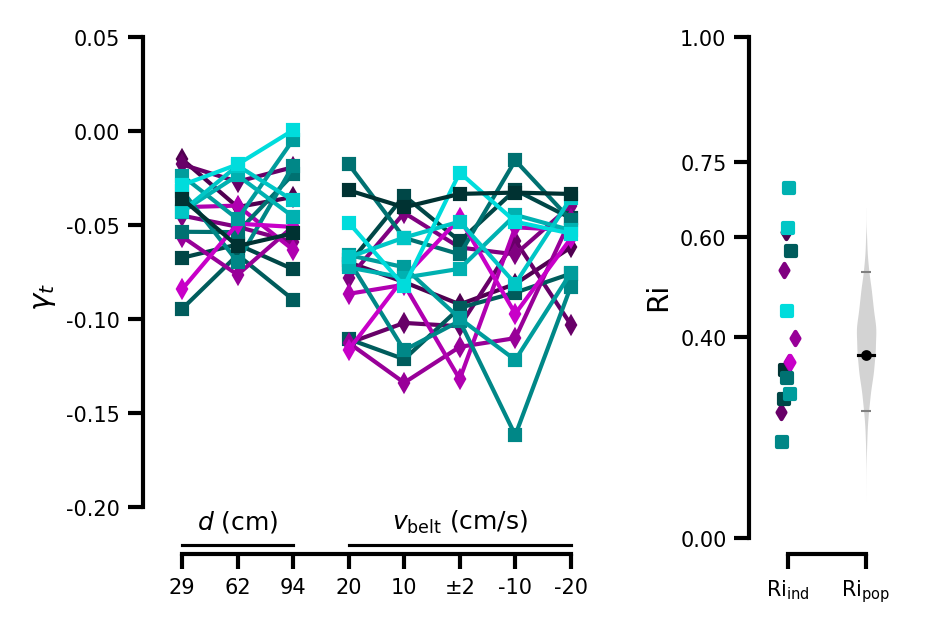

In [22]:
def Figure5BLeft(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    x = np.arange(len(conds))

    for animal in intact:
        ydist = np.array([gamma_t[animal][cond] for cond in ["60", "90", "120"]])
        yTM = np.array([gamma_t[animal][cond] for cond in ["20", "10", "2", "rev10", "rev20"]])
        yBetween = np.array([gamma_t[animal][cond] for cond in ["120", "rev20"]])

        zorder = 2 if animal == 'RatM00' else 1
        ax.plot([0, 1, 2], ydist, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)
        ax.plot([3, 4, 5, 6, 7], yTM, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)

    ax.set_xticks(x)
    ax.set_xticklabels(["29", "62", "94", "20", "10", "±2", "-10", "-20"])
    ax.set_ylabel(r'$\gamma_t$')
    ax.set_xlim(0, 7)
    ax.set_ylim(-0.2, .05)
    space_axes(ax, y_ratio=.1, x_ratio_left=.1, x_ratio_right=.1)

    # ax.plot([0, 2], [-.22, -.22], color='k', lw=.75, zorder=1)
    # ax.plot([3, 7], [-.22, -.22], color='k', lw=.75, zorder=1)
    # ax.annotate(r'$d$' + ' (cm)', xy=(1, -.2125), xytext=(1, -.2125), ha='center', va='center', fontsize=6)
    # ax.annotate(r'$v_{belt}$' + ' (cm/s)', xy=(5, -.2125), xytext=(5, -.2125), ha='center', va='center', fontsize=6)
    annotation_d_vbelt(ax=ax, miny=-0.2)

def Figure5BRight(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    populationRi, indivRi, (conf_bottom, conf_top, ICC_bootstrap) = compute_ICC(gamma_t, animalList=intact, bootstrap=True)
    

    for animal in intact: 
        ax.scatter(np.random.normal(0, 0.005), indivRi[animal], 
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)


    ax.plot([.09, .11], [populationRi, populationRi], color='k', lw=.75, zorder=1)
    ax.scatter(.1, populationRi, color='k', s=2.5, zorder=2)
    
    violin_parts = ax.violinplot(positions=[.1], 
                    dataset=[ICC_bootstrap],
                    widths=.025, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('lightgray')
        vp.set_edgecolor('lightgray')
        vp.set_linewidth(0)
        vp.set_alpha(1)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(.5)
    violin_parts['cquantiles'].set_alpha(1)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

    ax.set_ylim(0, 1)
    ax.set_xlim(0, .1)
    ax.set_xticks([0, .1])
    ax.set_xticklabels([r"$\mathrm{Ri_{ind}}$", r"$\mathrm{Ri_{pop}}$"])
    ax.set_ylabel("Ri")
    space_axes(ax, x_ratio_left=.5, x_ratio_right=.5)

    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)

fig, axs = plt.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios': [3, 1]})
Figure5BLeft(axs[0])
Figure5BRight(axs[1])

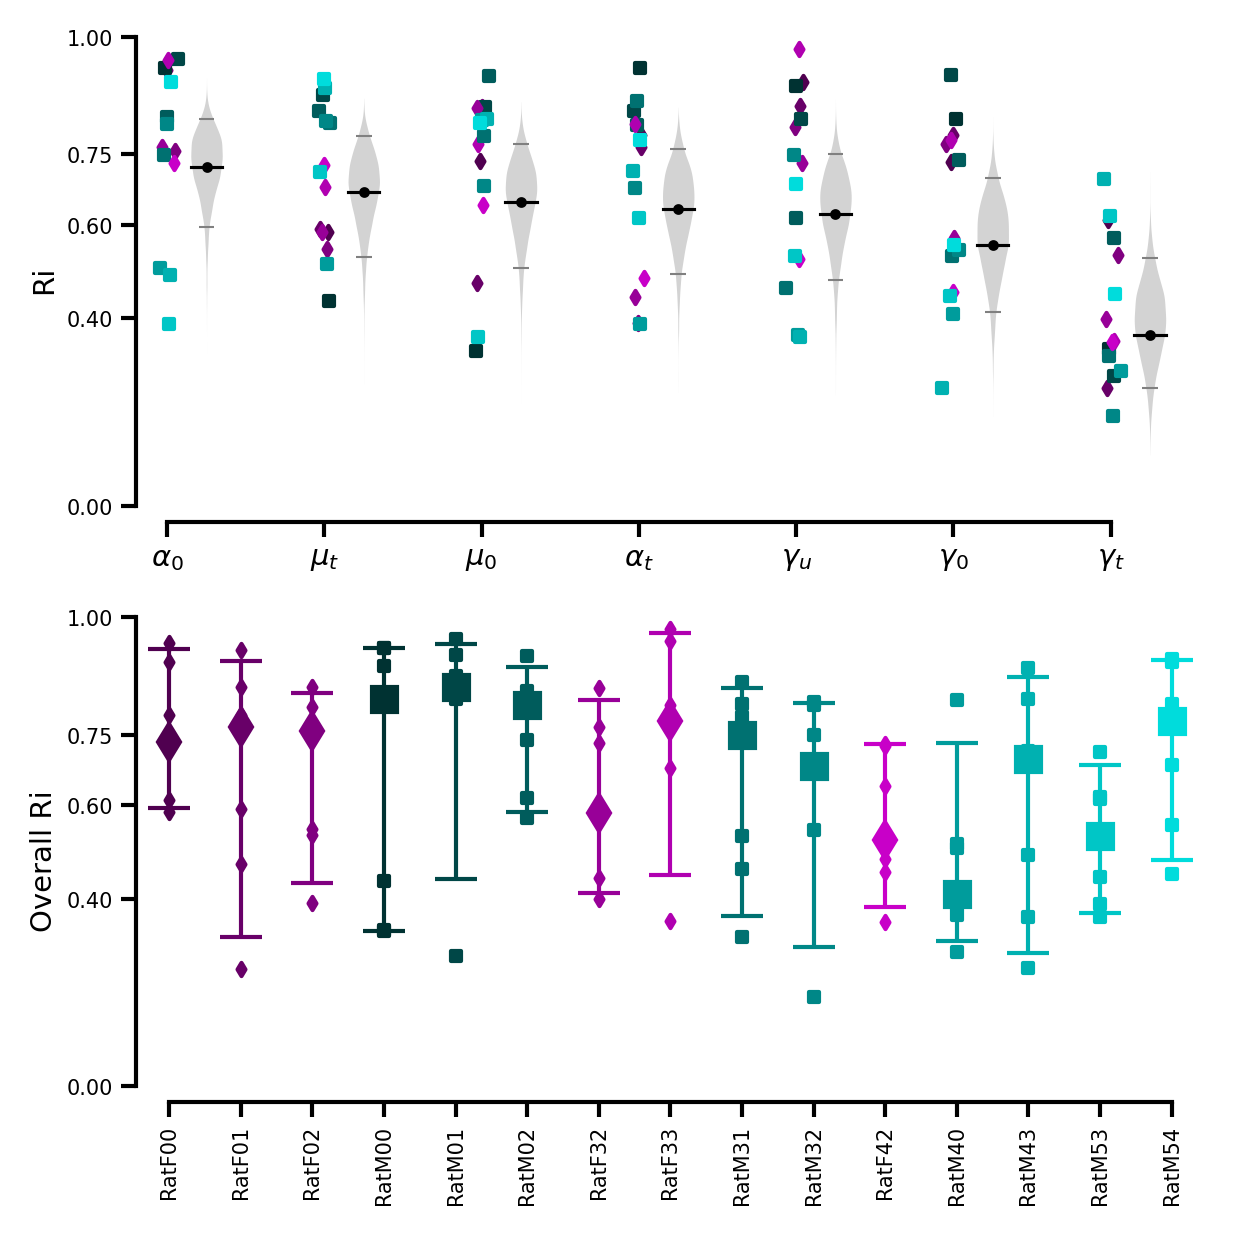

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

def Figure5C(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    vars = alpha_0, alpha_t, gamma_0, gamma_t, gamma_u, mu_0, mu_t
    names = ('alpha_0', 'alpha_t', 'gamma_0', 'gamma_t', 'gamma_u', 'mu_0', 'mu_t')
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$"]

    populationRi = {}
    conf_bottom = {}
    conf_top = {}
    indivRi = {}
    ICC_bootstrap = {}

    if os.path.exists("picklejar/ICC_resamples.p"):
        populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap = pickle.load(open("picklejar/ICC_resamples.p", "rb"))
    else:
        for i, (var, name) in enumerate(zip(vars, names)):
            populationRi[name], indivRi[name], (conf_bottom[name], conf_top[name], ICC_bootstrap[name]) = compute_ICC(var, animalList=intact, bootstrap=True)
        pickle.dump([populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap], open("picklejar/ICC_resamples.p", "wb"))

    # sort the vars by populationRi
    sorted_names = [x for _,x in sorted(zip(populationRi.values(), names), reverse=True)]
    sorted_labels = [x for _,x in sorted(zip(populationRi.values(), labels), reverse=True)]


    for i, name in enumerate(sorted_names):
        for animal in intact:
            ax.scatter(np.random.normal(i, 0.025), indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

        # femalesRi = [indivRi[name][animal] for animal in intact if 'F' in animal]
        # malesRi = [indivRi[name][animal] for animal in intact if 'M' in animal]
        # print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
        # print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

        line = 0.2/2
        ax.plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='k', lw=.75, zorder=1)
        ax.scatter(i+.25, populationRi[name], color='k', s=2.5, zorder=2)

        violin_parts = ax.violinplot(positions=[i+.25], 
                        dataset=[ICC_bootstrap[name]],
                        widths=.2, showextrema=False, 
                        quantiles=[0.05, 0.95])
        
        for vp in violin_parts['bodies']:
            vp.set_facecolor('lightgray')
            vp.set_edgecolor('lightgray')
            vp.set_linewidth(0)
            vp.set_alpha(1)
            vp.set_zorder(0)

        violin_parts['cquantiles'].set_facecolor('gray')
        violin_parts['cquantiles'].set_edgecolor('gray')
        violin_parts['cquantiles'].set_linewidth(.5)
        violin_parts['cquantiles'].set_alpha(1)
        violin_parts['cquantiles'].set_zorder(1)
        
        for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
            try:
                vp = violin_parts[partname]
                vp.set_edgecolor('gray')
                vp.set_linewidth(0)
                vp.set_alpha(0)
            except:
                pass

    ax.set_xlim(0, len(sorted_labels)-1)
    ax.set_xticks(range(len(sorted_labels)))
    ax.set_xticklabels(sorted_labels, fontsize=7)
    ax.set_ylabel('Ri')
    ax.set_ylim(0, 1)
    # ax.set_yticklabels('')
    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    space_axes(ax, x_ratio_right=.1)


def Figure5D(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    vars = alpha_0, alpha_t, gamma_0, gamma_t, gamma_u, mu_0, mu_t
    names = ('alpha_0', 'alpha_t', 'gamma_0', 'gamma_t', 'gamma_u', 'mu_0', 'mu_t')
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$"]

    populationRi = {}
    conf_bottom = {}
    conf_top = {}
    indivRi = {}
    ICC_bootstrap = {}

    if os.path.exists("picklejar/ICC_resamples.p"):
        populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap = pickle.load(open("picklejar/ICC_resamples.p", "rb"))
    else:
        for i, (var, name) in enumerate(zip(vars, names)):
            populationRi[name], indivRi[name], (conf_bottom[name], conf_top[name], ICC_bootstrap[name]) = compute_ICC(var, animalList=intact, bootstrap=True)
        pickle.dump([populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap], open("picklejar/ICC_resamples.p", "wb"))

    for i, animal in enumerate(intact):

        ax.scatter([i] * len([indivRi[name][animal] for name in names]),
                        [indivRi[name][animal] for name in names],
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                        
        lower = np.percentile([indivRi[name][animal] for name in names], 5)
        upper = np.percentile([indivRi[name][animal] for name in names], 95)

        ax.errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                        yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                                [upper - np.median([indivRi[name][animal] for name in names])]],
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                        capsize=5, capthick=1, elinewidth=1)

    ax.set_xlim(0, len(intact)-1)
    ax.set_xticks(range(len(intact)))
    ax.set_xticklabels(intact, rotation=90)
    ax.set_ylabel('Overall Ri')
    ax.set_ylim(0, 1)
    # ax.set_yticklabels('')
    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])   
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    space_axes(ax)


Figure5C(axs[0])
Figure5D(axs[1])

In [41]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.cluster import hierarchy


def do_LDA_old():
    intact = ['RatF00', 'RatF01',  'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                'RatF32', 'RatF33', 'RatM31', 'RatM32', 
                'RatF42', 'RatM40', 'RatM43', 
                'RatM53', 'RatM54']  
    
    alpha, alpha_t, alpha_u, gamma, gamma_t, gamma_u, mu, mu_t, mu_u, sigma, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    vars = alpha, alpha_t, gamma, gamma_t, gamma_u, mu, mu_t,
    names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_u', 'mu', 'mu_t'

    df = pd.DataFrame(index=intact)
    for var, name in zip(vars, names):
        l = np.array(list(compute_intercept(var, intact).values()))  # x - Xmean
        df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
    
    data = df.to_numpy()
    labels = df.index.to_numpy()
    labels = ['M' if 'M' in animal else 'F' for animal in labels]
    lda = LDA(solver='eigen', shrinkage='auto')
    lda.fit(data, labels)
    X_lda = lda.transform(data)
    return X_lda, lda

def do_PCA_old(n_comp=2):
    intact = ['RatF00', 'RatF01',  'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                'RatF32', 'RatF33', 'RatM31', 'RatM32', 
                'RatF42', 'RatM40', 'RatM43', 
                'RatM53', 'RatM54']
            
    animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
                'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54']

    alpha, alpha_t, alpha_u, gamma, gamma_t, gamma_u, mu, mu_t, mu_u, sigma, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    # vars = alpha, alpha_t, alpha_u, gamma, gamma_t, gamma_u, mu, mu_t, mu_u, sigma, sigma_t, sigma_u
    # names = 'alpha', 'alpha_t', 'alpha_u', 'gamma', 'gamma_t', 'gamma_u', 'mu', 'mu_t', 'mu_u', 'sigma', 'sigma_t', 'sigma_u'

    vars = alpha, alpha_t, gamma, gamma_t, gamma_u, mu, mu_t,
    names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_u', 'mu', 'mu_t'

    df = pd.DataFrame(index=intact)
    for var, name in zip(vars, names):
        l = np.array(list(compute_intercept(var, intact).values()))
        df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1

    data = df.to_numpy()
    labels = df.index.to_numpy()
    variables = df.columns.to_numpy()

    pca = PCA(n_components=n_comp) # estimate only 2 PCs
    X_new = pca.fit_transform(data) # project the original data into the PCA space

    return X_new, pca

do_PCA_old()
do_LDA_old()

(array([[ 3.59706426],
        [ 2.19407723],
        [ 2.8429328 ],
        [-1.92718854],
        [-0.91528346],
        [-0.83931313],
        [ 2.06318408],
        [ 2.74937454],
        [-3.67208245],
        [-0.05800968],
        [ 0.66494459],
        [ 0.67698157],
        [-2.75726301],
        [-2.53553568],
        [-2.08388311]]),
 LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen'))

In [42]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.cluster import hierarchy


def do_LDA():
    intact = ['RatF00', 'RatF01',  'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                'RatF32', 'RatF33', 'RatM31', 'RatM32', 
                'RatF42', 'RatM40', 'RatM43', 
                'RatM53', 'RatM54']  
    
    alpha, alpha_t, alpha_u, gamma, gamma_t, gamma_u, mu, mu_t, mu_u, sigma, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    effort_sensitivity_0, effort_sensitivity_t, effort_sensitivity_u, power = pickle.load(open('picklejar/effort_sensitivity_fit.p', 'rb'))


    vars = alpha, alpha_t, gamma, gamma_t, gamma_u, effort_sensitivity_0, effort_sensitivity_t, power
    names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_u', 'mu', 'mu_t', 'beta'

    df = pd.DataFrame(index=intact)
    for var, name in zip(vars, names):
        if name in ['alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_u']:
            l = np.array(list(compute_intercept(var, intact).values()))  # x - Xmean
            df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
        else:
            l = [[var[animal] - np.mean([var[animal] for animal in intact])] for animal in intact]/ np.std([var[animal] for animal in intact])
            df[name] = l / np.std(l)

    data = df.to_numpy()
    labels = df.index.to_numpy()
    labels = ['M' if 'M' in animal else 'F' for animal in labels]
    lda = LDA(solver='eigen', shrinkage='auto')
    lda.fit(data, labels)
    X_lda = lda.transform(data)
    return X_lda, lda

def do_PCA(n_comp=2):
    intact = ['RatF00', 'RatF01',  'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                'RatF32', 'RatF33', 'RatM31', 'RatM32', 
                'RatF42', 'RatM40', 'RatM43', 
                'RatM53', 'RatM54']
            

    alpha, alpha_t, alpha_u, gamma, gamma_t, gamma_u, mu, mu_t, mu_u, sigma, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    effort_sensitivity_0, effort_sensitivity_t, effort_sensitivity_u, power = pickle.load(open('picklejar/effort_sensitivity_fit.p', 'rb'))

    vars = alpha, alpha_t, gamma, gamma_t, gamma_u, effort_sensitivity_0, effort_sensitivity_t, power
    names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_u', 'mu', 'mu_t', 'beta'


    df = pd.DataFrame(index=intact)
    for var, name in zip(vars, names):
        if name in ['alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_u']:
            l = np.array(list(compute_intercept(var, intact).values()))  # x - Xmean
            df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
        else:
            l = [[var[animal] - np.mean([var[animal] for animal in intact])] for animal in intact]/ np.std([var[animal] for animal in intact])
            df[name] = l / np.std(l)

    data = df.to_numpy()
    labels = df.index.to_numpy()
    variables = df.columns.to_numpy()

    pca = PCA(n_components=n_comp) # estimate only 2 PCs
    X_new = pca.fit_transform(data) # project the original data into the PCA space

    return X_new, pca

do_PCA()
do_LDA()

(array([[ 3.41796026],
        [ 2.45841841],
        [ 2.02465857],
        [-1.8214491 ],
        [-1.32202691],
        [-0.36085063],
        [ 1.8193171 ],
        [ 2.95422483],
        [-3.77914615],
        [ 0.74992762],
        [ 0.43731133],
        [ 0.75885233],
        [-2.79726622],
        [-2.41179081],
        [-2.1281406 ]]),
 LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen'))

$\alpha_0$ 1.559449577235165
$\alpha_t$ -1.0736853322779538
$\gamma_0$ 3.334476807547822
$\gamma_t$ 0.04442226675756722
$\gamma_u$ -1.8154775295065138
$\varsigma_0$ 1.402018588875368
$\varsigma_t$ -0.407799431204663
$\beta$ 0.7159532985136984


/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


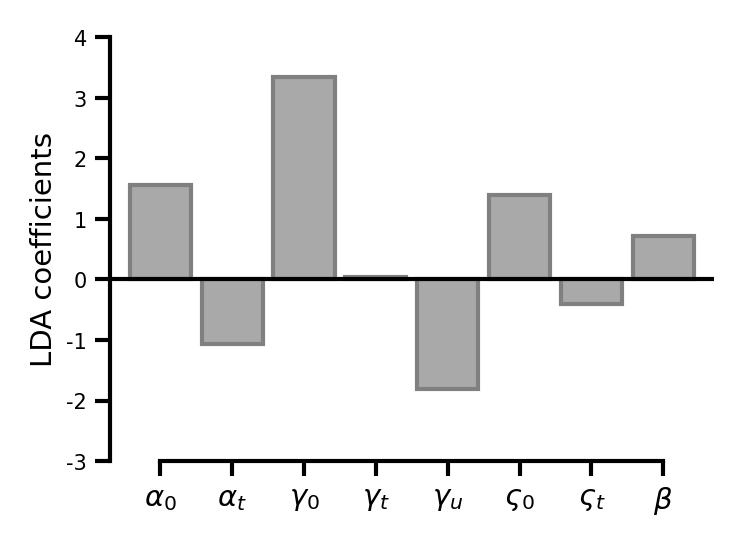

In [44]:
def Figure5G(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(cm2inch(6), cm2inch(13)/3))

    vars = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', 
            r"$\gamma_t$", r"$\gamma_u$", r'$\varsigma_0$', r"$\varsigma_t$", r"$\beta$"]
    score, lda = do_LDA()
    for var, coef in zip(vars, lda.coef_[0]):
        print(var, coef)
        ax.bar(var, coef, color='gray', width=.85, facecolor='darkgray', edgecolor='gray', lw=1, zorder=1)

    ax.set_xlim(0, 7)
    ax.set_ylim(-3, 4)
    ax.set_xticklabels(vars, fontsize=7)
    # ax.set_yticks([0, 0.5, 1])
    ax.set_ylabel('LDA coefficients')
    ax.axhline(0, color='k', lw=1)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)

Figure5G()

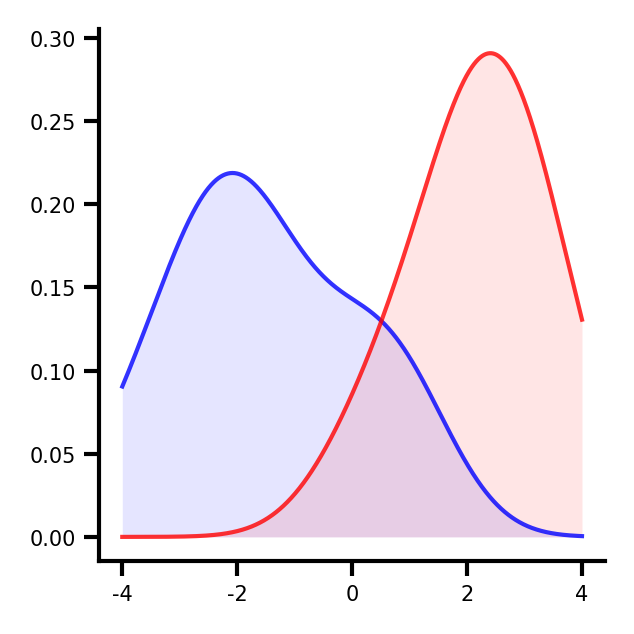

In [45]:
from sklearn.neighbors import KernelDensity


def plot_kde(data, bandwidth=1, ax=None, color='k'):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    data = np.array(data).reshape(-1, 1)
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data)

    # Compute log density scores
    xx = np.linspace(-4, 4, 1000).reshape(-1, 1)
    log_densities = kde.score_samples(xx)
    densities = np.exp(log_densities)
    
    ax.plot(xx, densities, color=color, lw=1, alpha=0.8)
    ax.fill_between(xx.flatten(), densities, color=color, alpha=0.1, lw=0)

score, lda = do_LDA()

X_lda_M = [score[i, 0] for i, animal in enumerate(intact) if 'M' in animal]
X_lda_F = [score[i, 0] for i, animal in enumerate(intact) if 'F' in animal]

# Example usage
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
plot_kde(X_lda_M, ax=ax, color='b')
plot_kde(X_lda_F, ax=ax, color='r')


RatF00 3.4179602568856122
RatF01 2.4584184054753955
RatF02 2.024658570063319
RatM00 -1.8214490978194253
RatM01 -1.3220269132971045
RatM02 -0.3608506347787783
RatF32 1.8193170978661228
RatF33 2.9542248313014885
RatM31 -3.7791461541091294
RatM32 0.7499276179613963
RatF42 0.4373113256021153
RatM40 0.7588523257286808
RatM43 -2.797266224942032
RatM53 -2.411790808113297
RatM54 -2.1281405978243617


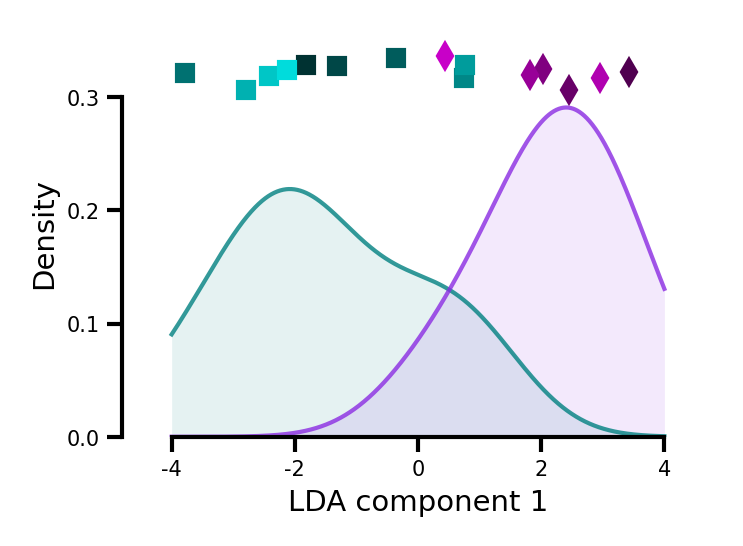

In [46]:
def Figure5H(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(cm2inch(6), cm2inch(13)/3))

    score, lda = do_LDA()

    np.random.seed(17)
    for i, animal in enumerate(intact):
        print(animal, score[i, 0])
        
        y = abs(np.random.normal(0.32, 0.0075))
        ax.plot(score[i, 0], y, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=4, zorder=10)


    X_lda_M = [score[i, 0] for i, animal in enumerate(intact) if 'M' in animal]
    X_lda_F = [score[i, 0] for i, animal in enumerate(intact) if 'F' in animal]

    plot_kde(X_lda_M, ax=ax, color='teal')
    plot_kde(X_lda_F, ax=ax, color='blueviolet')

    ax.set_xlim(-4, 4)
    ax.set_ylim(0, .3)
    ax.set_yticks([0, 0.1, 0.2, 0.3])
    ax.set_xlabel('LDA component 1')
    ax.set_ylabel('Density')
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1, top_y=.2)

Figure5H()

In [30]:
# def Figure5H(ax=None):
#     if ax is None:
#         fig, ax = plt.subplots(1, 1, figsize=(cm2inch(6), cm2inch(13)/3))

#     vars = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$"]
#     score, lda = do_LDA()


#     for i, animal in enumerate(intact):
#         print(animal, score[i, 0])
#         y = abs(np.random.normal(0.0, 0.0025))
#         ax.plot(score[i, 0], y, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=2.5, zorder=10)


#     X_lda_M = [score[i, 0] for i, animal in enumerate(intact) if 'M' in animal]
#     X_lda_F = [score[i, 0] for i, animal in enumerate(intact) if 'F' in animal]

#     violin_parts_M = ax.violinplot(X_lda_M, positions=[0], widths=.05, showmeans=False, showmedians=False, showextrema=False, vert=False)
#     violin_parts_F = ax.violinplot(X_lda_F, positions=[0], widths=.05, showmeans=False, showmedians=False, showextrema=False, vert=False)
#     violin_parts_M_ = ax.violinplot(X_lda_M, positions=[0], widths=.05, showmeans=False, showmedians=False, showextrema=False, vert=False)
#     violin_parts_F_ = ax.violinplot(X_lda_F, positions=[0], widths=.05, showmeans=False, showmedians=False, showextrema=False, vert=False)
    
    
#     for vp in violin_parts_M['bodies']:
#         V = vp.get_paths()[0].vertices
#         V[:, 1] = np.clip(V[:, 1], np.mean(V[:, 1]), np.inf)
#         vp.set_facecolor('teal')
#         vp.set_linewidth(0)
#         vp.set_alpha(0.5)
#         vp.set_zorder(0)

#     for vp in violin_parts_M_['bodies']:
        
#         V = vp.get_paths()[0].vertices
#         V[:, 1] = np.clip(V[:, 1], np.mean(V[:, 1]), np.inf)
#         vp.set_facecolor('none')
#         vp.set_edgecolor('teal')
#         vp.set_linewidth(1)
#         vp.set_alpha(1)
#         vp.set_zorder(1)


#     for vp in violin_parts_F['bodies']:
#         V = vp.get_paths()[0].vertices
#         V[:, 1] = np.clip(V[:, 1], np.mean(V[:, 1]), np.inf)

#         vp.set_facecolor('blueviolet')
#         vp.set_linewidth(0)
#         vp.set_alpha(.5)
#         vp.set_zorder(0)

#     for vp in violin_parts_F_['bodies']:
#         V = vp.get_paths()[0].vertices
#         V[:, 1] = np.clip(V[:, 1], np.mean(V[:, 1]), np.inf)

#         vp.set_facecolor('none')
#         vp.set_edgecolor('blueviolet')
#         vp.set_linewidth(1)
#         vp.set_alpha(1)
#         vp.set_zorder(1)

#     ax.set_xlim(-4, 4)
#     ax.set_ylim(-.01, .04)
#     # ax.set_yticks([0, 0.5, 1])
#     ax.set_xlabel('LDA component 1')
#     space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)

# Figure5H()

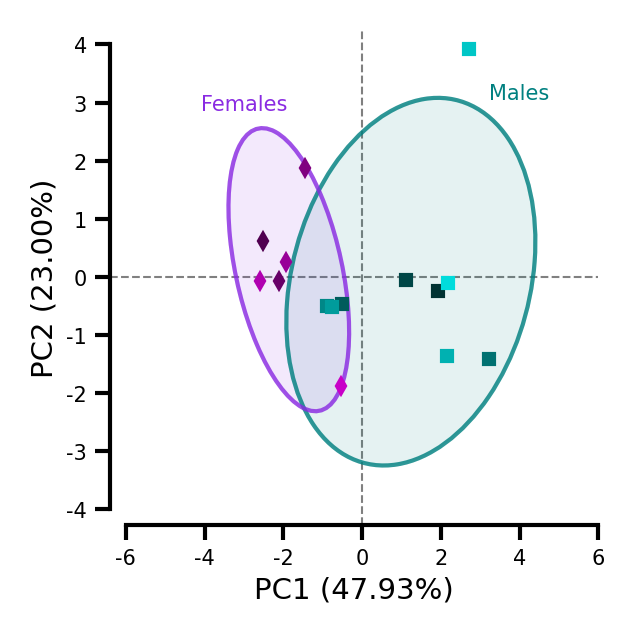

In [60]:
def Figure5E(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    score, pca = do_PCA()

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_males, y_males = [], []
    x_females, y_females = [], []

    for i, animal in enumerate(intact):
        ax.plot(x[i], y[i], linestyle='None',
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    markersize=2.5, zorder=10,
                    # mew=0.5, mec='k'
                    )
        if 'M' in animal:
            x_males.append(x[i])
            y_males.append(y[i])
        else:
            x_females.append(x[i])
            y_females.append(y[i])
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=-1)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=-1)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='teal', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='blueviolet', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-4, 4)
    space_axes(ax, x_ratio_right=0, top_y=1/30)

    ax.text(-3, 2.8, 'Females', color='blueviolet', ha='center', va='bottom', fontsize=5)
    ax.text(4, 3, 'Males', color='teal', ha='center', va='bottom', fontsize=5)


Figure5E()

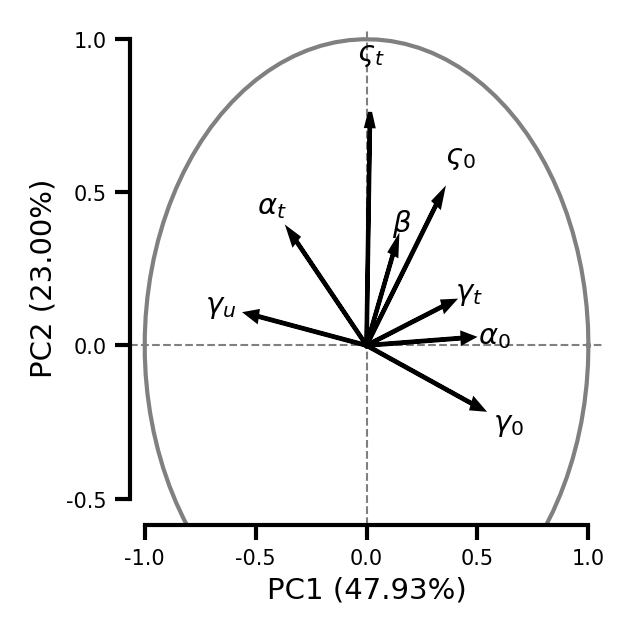

In [49]:
def Figure5F(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', 
            r"$\gamma_t$", r"$\gamma_u$", r'$\varsigma_0$', r"$\varsigma_t$", r"$\beta$"]
    
    score, pca = do_PCA()

    coeff = np.transpose(pca.components_[0:2, :])


    for i in range(len(labels)):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], 
                color='k', linestyle='-', linewidth=1, width=0.002, head_width=0.03, zorder=1)

        offset = 1.33
        x_offset, y_offset = 0, 0

        # if i == 1:  # alphat
        #     x_offset, y_offset = -.025, -.050
        # if i == 6:  # mut
        #     x_offset, y_offset = -0.0, -0.05

        # if i == 3:  # gammat
        #     x_offset, y_offset = .025, -0.1

        # if i == 5:  # mu0
        #     x_offset, y_offset = -0.10, -0.0


        ax.text(coeff[i, 0]*offset+x_offset, coeff[i, 1]*offset+y_offset, labels[i], 
                color='k', ha='center', va='center', fontsize=7)


    # plot circle
    theta = np.linspace(0, 2*np.pi, 100)
    radius = 1
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    ax.plot(x, y, color='gray', linewidth=1, zorder=0)


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-.5-1/30, 1+1/30)
    ax.set_yticks([-.5, 0, .5, 1])
    space_axes(ax)
    ax.spines['left'].set_bounds(-.5, 1)

Figure5F()

$\alpha_0$ 1.559449577235165
$\alpha_t$ -1.0736853322779538
$\gamma_0$ 3.334476807547822
$\gamma_t$ 0.04442226675756722
$\gamma_u$ -1.8154775295065138
$\varsigma_0$ 1.402018588875368
$\varsigma_t$ -0.407799431204663
$\beta$ 0.7159532985136984
RatF00 3.4179602568856122
RatF01 2.4584184054753955
RatF02 2.024658570063319
RatM00 -1.8214490978194253
RatM01 -1.3220269132971045
RatM02 -0.3608506347787783
RatF32 1.8193170978661228
RatF33 2.9542248313014885
RatM31 -3.7791461541091294
RatM32 0.7499276179613963
RatF42 0.4373113256021153
RatM40 0.7588523257286808
RatM43 -2.797266224942032
RatM53 -2.411790808113297
RatM54 -2.1281405978243617


/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


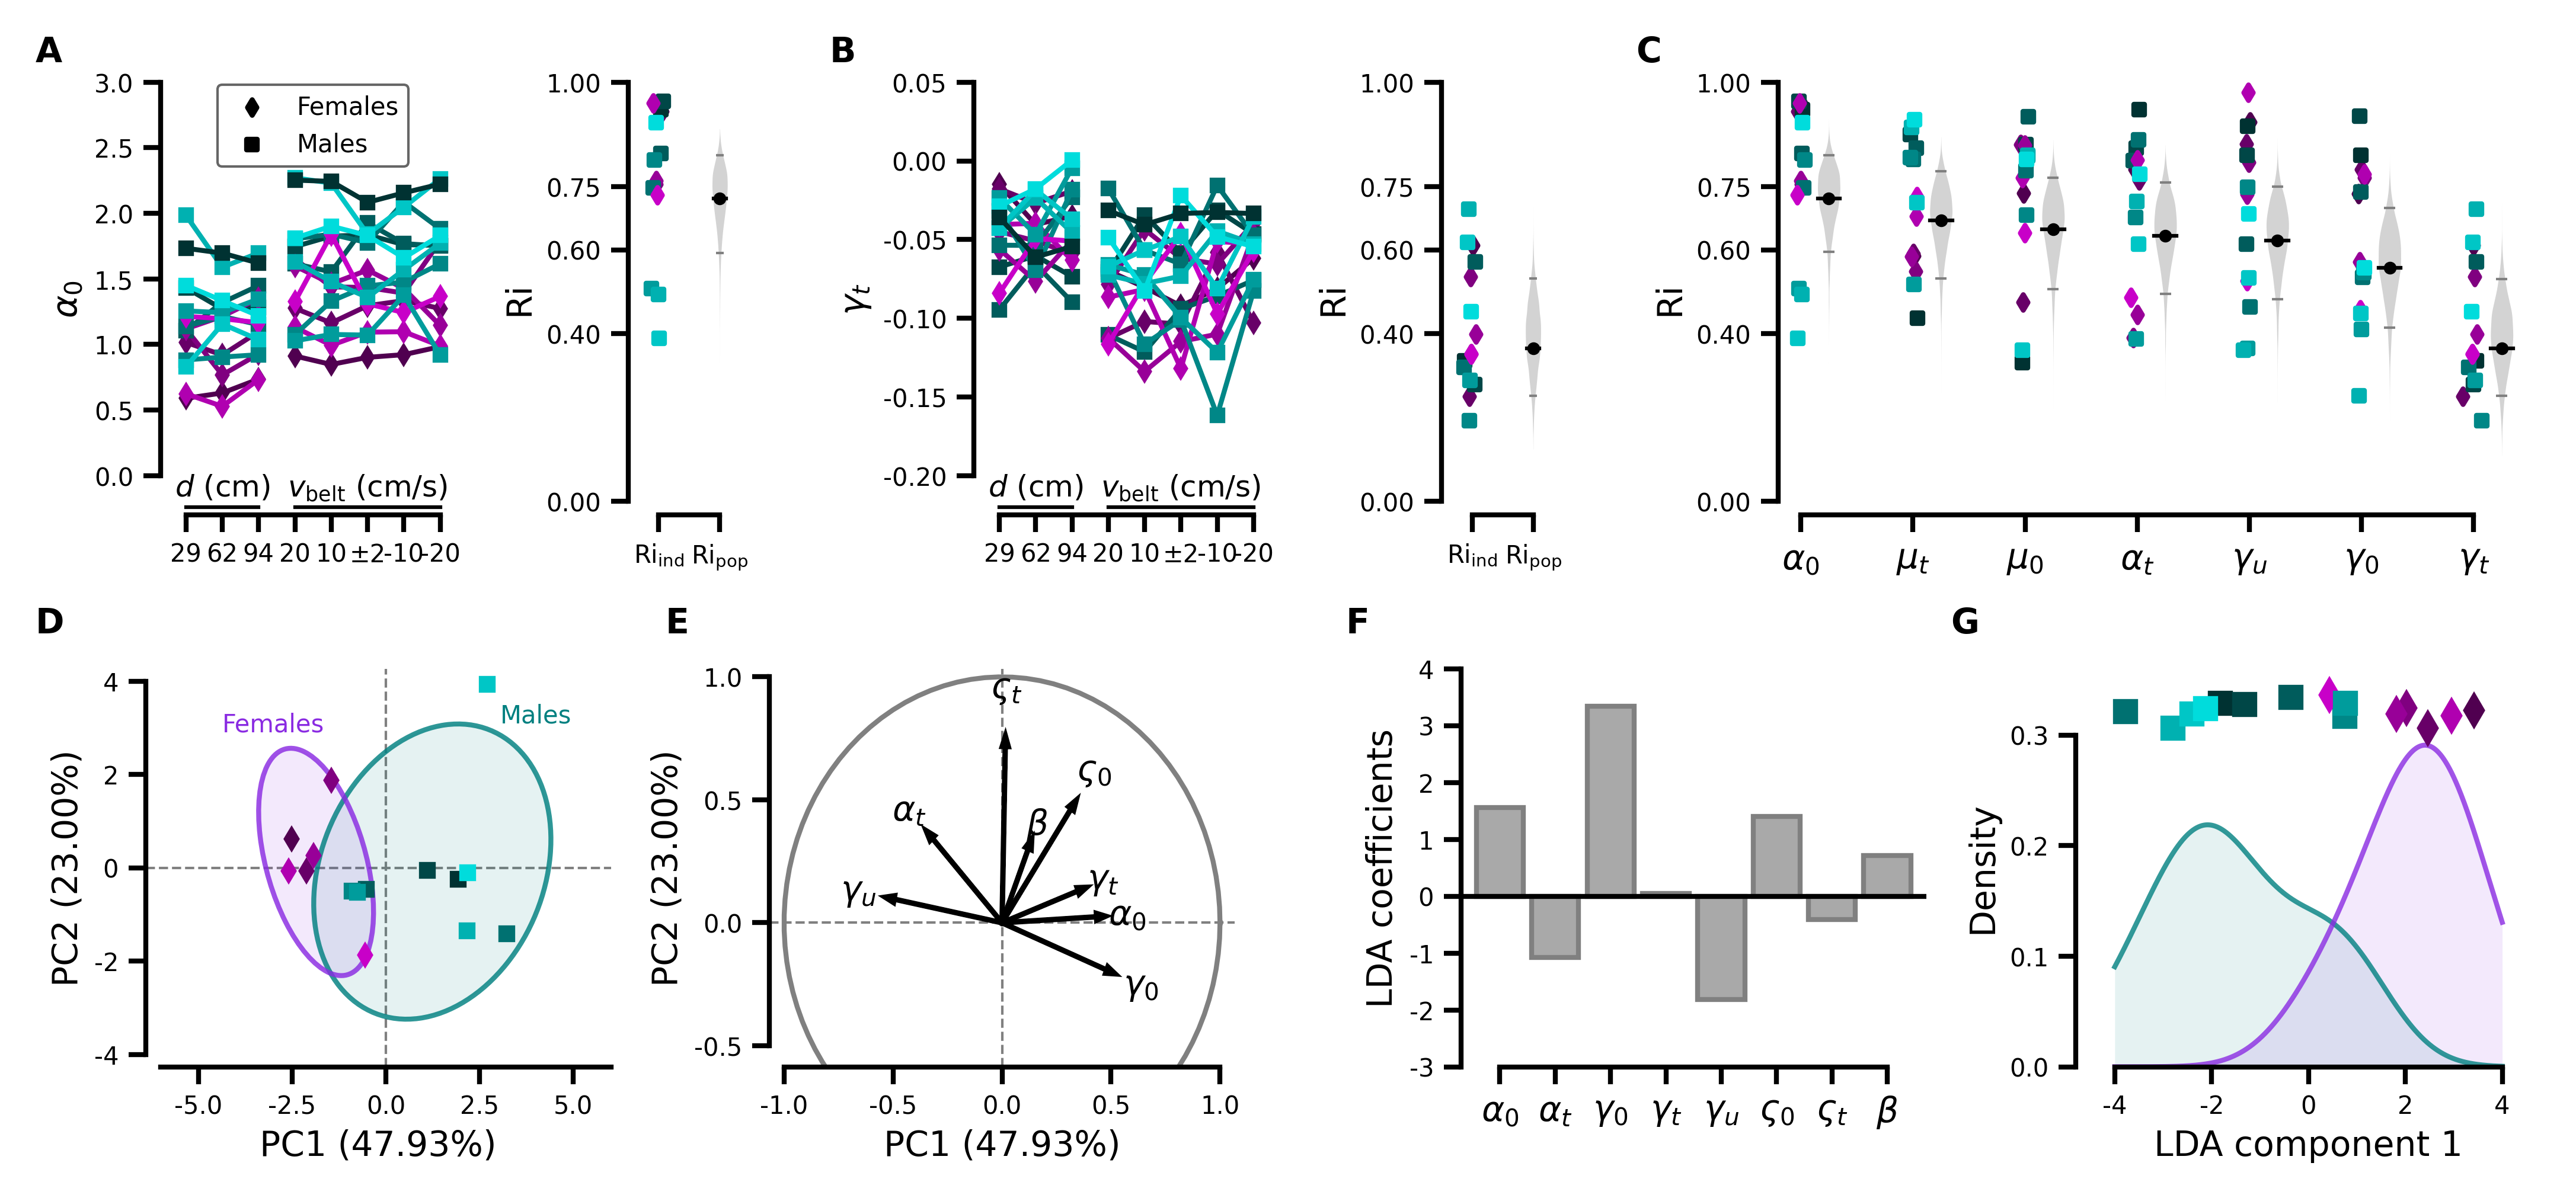

In [61]:
fig=plt.figure(figsize=(cm2inch(18), cm2inch(8)), dpi=600, constrained_layout=True, facecolor='w')

gs0 = fig.add_gridspec(3, 1 , hspace=0.5, height_ratios=[1, .1, 1])

row1 = gs0[0].subgridspec(1, 7, width_ratios=[2, .8, .1, 2, .8, .1, 5])
ax_alpha_0 = plt.subplot(row1[0])
ax_ICC_alpha_0 = plt.subplot(row1[1])
ax_gamma_t = plt.subplot(row1[3])
ax_ICC_gamma_t = plt.subplot(row1[4])
ax_uI_params = plt.subplot(row1[6])


row3 = gs0[2].subgridspec(1, 5, width_ratios=[1, 1, .1, 1, 1])
ax_PCA_params = plt.subplot(row3[0, 0])
ax_PCA_rats = plt.subplot(row3[0, 1])
ax_LDA_params = plt.subplot(row3[0, 3])
ax_LDA_rats = plt.subplot(row3[0, 4])


Figure5ALeft(ax_alpha_0)
Figure5ARight(ax_ICC_alpha_0)
Figure5C(ax_uI_params)

Figure5BLeft(ax_gamma_t)
Figure5BRight(ax_ICC_gamma_t)


Figure5E(ax_PCA_params)
Figure5F(ax_PCA_rats)
Figure5G(ax_LDA_params)
Figure5H(ax_LDA_rats)


figuresLabels={"A":[0.0, .99], "B":[0.315, .99], "C":[0.635, .99],
                "D":[0.0, .48], "E":[0.25, .48], "F":[0.52, .48], "G":[0.76, .48],
                }

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1], label, figure=fig, 
            weight='bold', fontsize=7, ha='left', va='bottom')



plt.savefig("/home/david/Desktop/code/figures_paper/Figure_S6.pdf", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("/home/david/Desktop/code/figures_paper/Figure_S6.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)

In [34]:
<<<<<

SyntaxError: invalid syntax (1150132145.py, line 1)

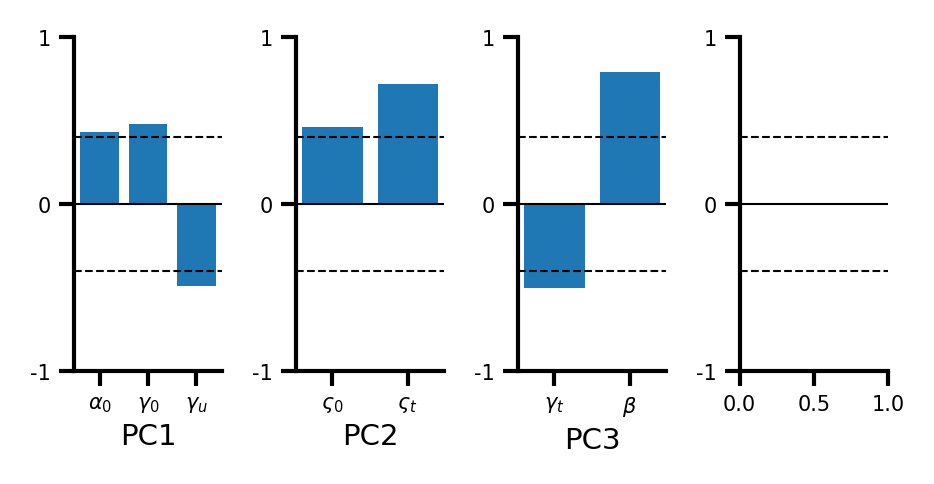

In [50]:
pca = do_PCA(n_comp=3)[1]
v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", 
        r'$\mu_0$', r"$\mu_t$"]
v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', 
            r"$\gamma_t$", r"$\gamma_u$", r'$\varsigma_0$', r"$\varsigma_t$", r"$\beta$"]


limitPos = 0.4
limitNeg = -0.4
# filter out the features that are > 0.5 or < -0.5
important_features_PC1 = [_ > limitPos or _ < limitNeg for _ in pca.components_[0, :]]
strenght_important_features_PC1 = [_ for _ in pca.components_[0, :] if _ > limitPos or _ < limitNeg]
labels_PC1 = [v[i] for i, x in enumerate(important_features_PC1) if x]

important_features_PC2 = [_ > limitPos or _ < limitNeg for _ in pca.components_[1, :]]
strenght_important_features_PC2 = [_ for _ in pca.components_[1, :] if _ > limitPos or _ < limitNeg]
labels_PC2 = [v[i] for i, x in enumerate(important_features_PC2) if x]

important_features_PC3 = [_ > limitPos or _ < limitNeg for _ in pca.components_[2, :]]
strenght_important_features_PC3 = [_ for _ in pca.components_[2, :] if _ > limitPos or _ < limitNeg]
labels_PC3 = [v[i] for i, x in enumerate(important_features_PC3) if x]

# important_features_PC4 = [_ > limitPos or _ < limitNeg for _ in pca.components_[3, :]]
# strenght_important_features_PC4 = [_ for _ in pca.components_[3, :] if _ > limitPos or _ < limitNeg]
# labels_PC4 = [v[i] for i, x in enumerate(important_features_PC4) if x]



fig, axs = plt.subplots(1, 4, figsize=(3, 1.5))
axs[0].bar(labels_PC1, strenght_important_features_PC1, )
axs[0].set_xlabel('PC1')
axs[1].bar(labels_PC2, strenght_important_features_PC2, )
axs[1].set_xlabel('PC2')
axs[2].bar(labels_PC3, strenght_important_features_PC3, )
axs[2].set_xlabel('PC3')
# axs[3].bar(labels_PC4, strenght_important_features_PC4, )
# axs[3].set_xlabel('PC4')

for ax in axs:
    ax.set_ylim(-1, 1)
    ax.set_yticks([-1, 0, 1])
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axhline(limitPos, color='black', linewidth=0.5, linestyle='--')
    ax.axhline(limitNeg, color='black', linewidth=0.5, linestyle='--')

In [ ]:
pca.explained_variance_ratio_

array([0.58538222, 0.19471696, 0.10150906])

In [ ]:
np.cumsum(pca.explained_variance_ratio_[0:4])

array([0.58538222, 0.78009917, 0.88160823])

RatF00 -2.848697311033637 0.6360850042595604 -0.45501386887753814
RatF01 -2.0219375149026866 -0.07007217689095094 -0.26210703868750945
RatF02 -2.444523982722698 2.747667744398153 -0.38684158944995156
RatM00 2.0663884222894926 0.8329184789470362 -0.5400494371303599
RatM01 1.02351622333414 -0.19124710561325345 -0.6785560200127843
RatM02 -0.12195838113687545 -0.6090273543142479 1.599360522133071
RatF32 -2.027525628349402 -0.9835388261472756 0.2602726909345433
RatF33 -2.486818545956899 -0.23408654680984675 -0.30738590131731264
RatM31 3.4746663215793374 -0.23102100576450443 -0.3779879890904428
RatM32 -0.46529531327804946 -1.1430713829340906 1.678390363949265
RatF42 -0.2284790900162086 -1.9826537821131298 -0.6880780822868712
RatM40 -0.5899207229303681 -0.7005084029423628 -0.3863281296851416
RatM43 2.5021385892863908 -0.6827542826559421 -0.5048904408669197
RatM53 1.984490997812316 1.8995684120813365 1.6138464756033677
RatM54 2.183955936025149 0.7117412264995202 -0.5646315552154156


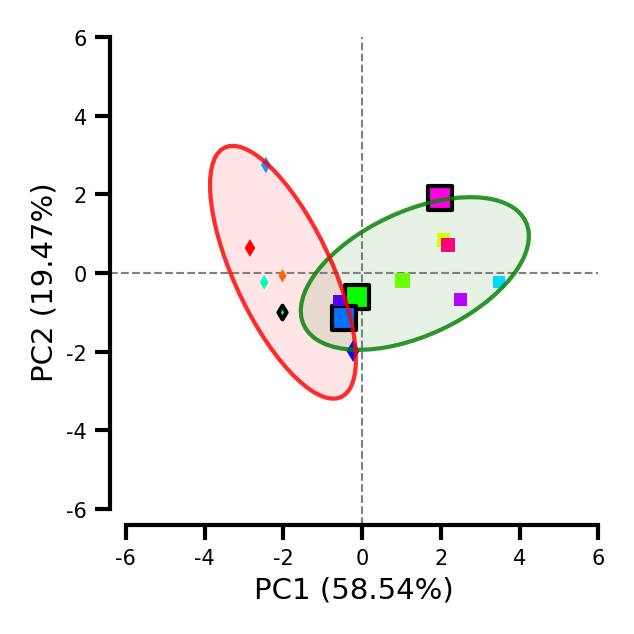

In [ ]:
def Figure5E(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_u$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$", r"$\mu_u$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_u$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA(n_comp=3)

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2
    z = score[:,2]  # PC3

    x_males, y_males = [], []
    x_females, y_females = [], []

    for i, animal in enumerate(intact):
        print(animal, x[i], y[i], z[i])
        ax.scatter(x[i], y[i],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    s=abs(z[i])*20, edgecolors='k' if z[i] > 0 else 'none', linewidths=1)
                    # s=np.sqrt(5))
        if 'M' in animal:
            x_males.append(x[i])
            y_males.append(y[i])
        else:
            x_females.append(x[i])
            y_females.append(y[i])
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    space_axes(ax, x_ratio_right=0)

Figure5E()

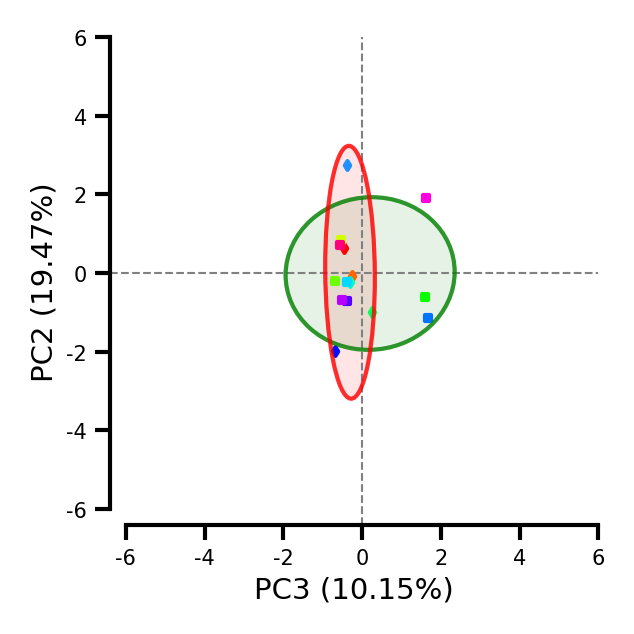

In [ ]:
def Figure5E(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_u$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$", r"$\mu_u$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_u$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA(n_comp=3)

    x = score[:,2]  # PC1
    y = score[:,1]  # PC2

    x_males, y_males = [], []
    x_females, y_females = [], []

    for i, animal in enumerate(intact):
        ax.scatter(x[i], y[i],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=np.sqrt(5))
        if 'M' in animal:
            x_males.append(x[i])
            y_males.append(y[i])
        else:
            x_females.append(x[i])
            y_females.append(y[i])
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    space_axes(ax, x_ratio_right=0)

Figure5E()